In [ ]:
import os
import argparse
import json
# from Evaluation import evaluation
import matplotlib.pyplot as plt
import numpy as np
import torchvision.models as models
import torch
import torch.nn as nn
import torch.optim as optim
from Preprocessing import datasetLoader

# import densenet
from cbam import CBAM
# torch.cuda.empty_cache()

# Description of all argument

In [ ]:
csvPath = 'csvPath'
datasetPath = 'datasetPath'
outputPath = 'outputPath'
batchSize = 32
nEpochs = 20
method = 'DenseNet201_CBAM'
device = torch.device('cuda')
print(device)
nClasses = 2

# device = torch.device('cpu')


# Definition of model architecture



# Creation of Log folder: used to save the trained model
log_path = os.path.join(outputPath, 'Clarkson_Dataset_Results/Logs')
print(log_path)
if not os.path.exists(log_path):
    os.mkdir(log_path)


# Creation of result folder: used to save the performance of trained model on the test set
result_path = os.path.join(outputPath , 'Clarkson_Dataset_Results/Results')
if not os.path.exists(result_path):
    os.mkdir(result_path)


args = { 
    csvPath : csvPath,
    datasetPath : datasetPath,
    outputPath : outputPath,
    batchSize : batchSize,
    nEpochs : nEpochs,
    method : 'DensNet201_CBAM',
    nClasses : nClasses
}
# Dataloader for train and test data
with open(os.path.join(log_path,'params.json'), 'w') as out:
    json.dump(args, out)

dataseta = datasetLoader(csvPath,datasetPath,train_test='train')
dl = torch.utils.data.DataLoader(dataseta, batch_size=batchSize, shuffle=True, num_workers=0, pin_memory=True)
dataset = datasetLoader(csvPath,datasetPath, train_test='test', c2i=dataseta.class_to_id)
test = torch.utils.data.DataLoader(dataset, batch_size=batchSize, shuffle=True, num_workers=0, pin_memory=True)
dataloader = {'train': dl, 'test':test}
c = 0
print(len(dl))
print(len(test))
# print(args.method)



cuda
drive/MyDrive/Output_DCNN_CBAM_Pretrained/Clarkson_Dataset_Results/Logs
155
99


In [ ]:
import torch.nn.functional as F

class DCNN_CBAM(nn.Module):
    def __init__(self, pretrained=True):
        super().__init__()
        dense = models.densenet201(pretrained=pretrained)
        # print(dense)
        features = list(dense.features.children())
        # print(dense.features[11])
        self.dense_1 = nn.Sequential(*features[:6])
        self.cbam_1 = CBAM(128,2)
        self.dense_2 = nn.Sequential(*features[6:8])
        self.cbam_2 = CBAM(256,2)
        self.dense_3 = nn.Sequential(*features[8:10])
        self.cbam_3 = CBAM(896,2)
        self.dense_4 = nn.Sequential(*features[10:-1])
        self.bn = nn.BatchNorm2d(1920)
        self.fc = nn.Linear(1920 , 2)
        
    def forward(self, x):
        y = self.dense_1(x)
        y = self.cbam_1(y)
        y = self.dense_2(y)
        y = self.cbam_2(y)
        y = self.dense_3(y)
        y = self.cbam_3(y)
        y = self.dense_4(y)
        y = F.avg_pool2d(F.sigmoid(y), 7)
        y = y.view(y.size(0),-1)
        y = self.fc(y)
        return y
model = DCNN_CBAM()
model = model.to(device)
lr = 0.0001
solver = optim.Adam(model.parameters(), lr=lr, weight_decay=1e-6)
lr_sched = optim.lr_scheduler.StepLR(solver, step_size=6, gamma=0.5)
criterion = nn.CrossEntropyLoss()
log = {'iterations':[], 'epoch':[], 'validation':[], 'train_acc':[], 'val_acc':[]}

dense = models.densenet201(pretrained=True)
# print(dense)
features = list(dense.features.children())



In [ ]:
print(model)

DCNN_CBAM(
  (dense_1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
   

In [ ]:
!pip install grad-cam

In [ ]:
from pytorch_grad_cam.grad_cam import GradCAM
cam = GradCAM(model=model, target_layers=model.dense_4, use_cuda=True)
input_tensor = []
targets = []
imageNames = []
for data,cls,imageName in dl:
  data = data.to(device)
  input_tensor = data
  input_tensor = input_tensor.to(device)
  targets = cls
  targets = targets.to(device)
  imageNames = imageName
  break

# print(input_tensor)


In [ ]:
from PIL import Image
import cv2
import torchvision.transforms as transforms
from pytorch_grad_cam.utils.image import show_cam_on_image
def generate_heat_maps(path,input_tensor):
  img = np.array(Image.open(path))
  img = cv2.resize(img, (224, 224))
  rgb_img = img.copy()
  img = np.float32(img) / 255
  transform = transforms.Compose([
            transforms.ToTensor(),
            # transforms.Normalize(mean=[0.485],std=[0.229])
            ])
  tensor = transform(img)
  tranform_img= tensor.repeat(3,1,1)
  tranform_img = tranform_img
  tranform_img.size()
  tensorToImage = transforms.ToPILImage()
  final_image = tensorToImage(tranform_img)
  final_image = np.array(final_image)
  final_image = np.float32(final_image)/255
  # print(type(final_image))
  # print(input_tensor.size())
  gray_scale_cam = cam(input_tensor)[0,:,:]
  # print(gray_scale_cam.shape)
  # print(img.shape)
  visualization = show_cam_on_image(final_image, gray_scale_cam, use_rgb=True)
  return visualization

In [ ]:
heat_maps = []
print(cls)  
for image in imageNames:
  
  heat_maps.append(generate_heat_maps('drive/MyDrive/Datasets_1/Clarkson_Dataset_1/'+image,input_tensor))

tensor([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
        1, 0, 1, 1, 0, 1, 1, 0])


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1944: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


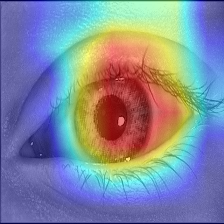

In [ ]:
Image.fromarray(heat_maps[4])

In [ ]:
#####################################################################################
#
############### Training of the model and logging ###################################
#
#####################################################################################
train_loss=[]
test_loss=[]
bestAccuracy = 0
bestEpoch=0
nEpochs = 20
for epoch in range(nEpochs):
    print(epoch)
    for phase in ['train', 'test']:
        train = (phase=='train')
        if phase == 'train':
            model.train()
        else:
            model.eval()

        tloss = 0.
        acc = 0.
        tot = 0
        c = 0
        testPredScore = []
        testTrueLabel = []
        imgNames=[]
        with torch.set_grad_enabled(train):
            for data, cls, imageName in dataloader[phase]:

                # Data and ground truth
                data = data.to(device)
                # print("Batch size is " ,data.size())
                cls = cls.to(device)
                # print(data)
                # Running model over data
                outputs = model(data)
                # print(outputs)
                # Prediction of accuracy
                # print(outputs)
                k = torch.max(outputs,dim = 1)
                
                pred = torch.max(outputs,dim=1)[1]
                
                corr = torch.sum((pred == cls).int())
                # print(corr)

                acc += corr.item()
                # print(acc)
                tot += data.size(0)
                loss = criterion(outputs, cls)

                # Optimization of weights for training data
                if phase == 'train':
                    solver.zero_grad()
                    loss.backward()
                    solver.step()
                    log['iterations'].append(loss.item())
                elif phase == 'test':
                    temp = outputs.detach().cpu().numpy()
                    # print(temp.shape)
                    scores = np.stack((temp[:,0], np.amax(temp[:,1:nClasses], axis=1)), axis=-1)
                    # print(scores)
                    testPredScore.extend(scores)
                    testTrueLabel.extend((cls.detach().cpu().numpy()>0)*1)
                    imgNames.extend(imageName)

                tloss += loss.item()
                c += 1

        # Logging of train and test results
        if phase == 'train':
            log['epoch'].append(tloss/c)
            log['train_acc'].append(acc/tot)
            print('Epoch: ', epoch, 'Train loss: ',tloss/c, 'Accuracy: ', acc/tot)
            train_loss.append(tloss / c)
        elif phase == 'test':
            log['validation'].append(tloss / c)
            log['val_acc'].append(acc / tot)
            print('Epoch: ', epoch, 'Test loss:', tloss / c, 'Accuracy: ', acc / tot)
            lr_sched.step(tloss / c)
            test_loss.append(tloss / c)
            accuracy = acc / tot
            if (accuracy >= bestAccuracy):
                bestAccuracy =accuracy
                testTrueLabels = testTrueLabel
                testPredScores = testPredScore
                bestEpoch = epoch
                testImgNames= imgNames
                save_best_model = os.path.join(log_path,method+'_best.pth')
                states = {
                    'epoch': epoch + 1,
                    'state_dict': model.state_dict(),
                    'optimizer': solver.state_dict(),
                }
                torch.save(states, save_best_model)
    with open(os.path.join(log_path,method+'_log.json'), 'w') as out:
          json.dump(log, out)
    torch.save(model.state_dict(), os.path.join(log_path,method+'_model.pt'))


0


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1944: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch:  0 Train loss:  0.32569325013506795 Accuracy:  0.9120923637836743
Epoch:  0 Test loss: 0.20588271146771883 Accuracy:  0.9458518049398353


/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


1
Epoch:  1 Train loss:  0.04074019262146565 Accuracy:  0.9951387482276687
Epoch:  1 Test loss: 0.24512850794226232 Accuracy:  0.928435718809373
2
Epoch:  2 Train loss:  0.012313363370635818 Accuracy:  0.9989872392140976
Epoch:  2 Test loss: 0.19750590757890182 Accuracy:  0.9550348321722609
3
Epoch:  3 Train loss:  0.004641970353681715 Accuracy:  1.0
Epoch:  3 Test loss: 0.172377045565012 Accuracy:  0.9645345155161494
4
Epoch:  4 Train loss:  0.003736711127473222 Accuracy:  0.9997974478428195
Epoch:  4 Test loss: 0.1767807197533642 Accuracy:  0.9601013299556681
5
Epoch:  5 Train loss:  0.001982013183465648 Accuracy:  1.0
Epoch:  5 Test loss: 0.2799336350137236 Accuracy:  0.9509183027232425
6
Epoch:  6 Train loss:  0.004887947187037958 Accuracy:  0.9991897913712781
Epoch:  6 Test loss: 0.6403464625326145 Accuracy:  0.8784040531982267
7
Epoch:  7 Train loss:  0.013656290739233936 Accuracy:  0.9955438525420296
Epoch:  7 Test loss: 0.2532117908933397 Accuracy:  0.9379354021532615
8
Epoch: 

In [ ]:
acc_u = 0.0
tot_u = 0
scores_u =[]
temp_u =[]
testTrueLabel_u =[]
testPredScore_u = []
imgNames_u = []
tloss_u = 0.0
c_u = 0
modelPath = 'drive/MyDrive/Output_DCNN_CBAM_Pretrained/Clarkson_Dataset_Results/Logs/DenseNet201_CBAM_best.pth'
# model_nd = models.densenet201(pretrained=True)
# num_ftrs = model_nd.classifier.in_features
# model_nd.classifier = nn.Linear(num_ftrs, 2)
model_nd = DCNN_CBAM()
device = torch.device('cuda')
weights = torch.load(modelPath)
model_nd.load_state_dict(weights['state_dict'])
model_nd = model_nd.to(device)

for data, cls, imageName in test:
  data = data.to(device)
  # print("Batch size is " ,data.size())
  cls = cls.to(device)
  # print(data)
  # Running model over data
  outputs = model_nd(data)
  # print(outputs)
  # Prediction of accuracy
  # print(outputs)
  k = torch.max(outputs,dim = 1)
  
  pred = torch.max(outputs,dim=1)[1]
  
  corr = torch.sum((pred == cls).int())
  print(corr)
  # print(corr)

  acc_u += (corr.item())/data.size(0)
  # print(acc)
  # tot_u += data.size(0)
  loss = criterion(outputs, cls)

  temp_u = outputs.detach().cpu().numpy()
  # print(temp.shape)
  scores_u = np.stack((temp_u[:,0], np.amax(temp_u[:,1:nClasses], axis=1)), axis=-1)
  # print(scores)
  testPredScore_u.extend(scores_u)
  testTrueLabel_u.extend((cls.detach().cpu().numpy()>0)*1)
  imgNames_u.extend(imageName)

  tloss_u += loss.item()
  c_u += 1

    
print('Test loss:', tloss_u / c_u, 'Accuracy: ', acc_u/c_u)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1944: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


tensor(26, device='cuda:0')
tensor(26, device='cuda:0')
tensor(29, device='cuda:0')
tensor(30, device='cuda:0')
tensor(26, device='cuda:0')
tensor(30, device='cuda:0')
tensor(32, device='cuda:0')
tensor(30, device='cuda:0')
tensor(28, device='cuda:0')
tensor(30, device='cuda:0')
tensor(29, device='cuda:0')
tensor(28, device='cuda:0')
tensor(29, device='cuda:0')
tensor(29, device='cuda:0')
tensor(28, device='cuda:0')
tensor(30, device='cuda:0')
tensor(29, device='cuda:0')
tensor(28, device='cuda:0')
tensor(28, device='cuda:0')
tensor(31, device='cuda:0')
tensor(29, device='cuda:0')
tensor(28, device='cuda:0')
tensor(29, device='cuda:0')
tensor(27, device='cuda:0')
tensor(31, device='cuda:0')
tensor(27, device='cuda:0')
tensor(31, device='cuda:0')
tensor(25, device='cuda:0')
tensor(23, device='cuda:0')
tensor(29, device='cuda:0')
tensor(28, device='cuda:0')
tensor(27, device='cuda:0')
tensor(30, device='cuda:0')
tensor(30, device='cuda:0')
tensor(26, device='cuda:0')
tensor(31, device='c

In [ ]:
# print(bestAccuracy)
print(testPredScores)
predict = np.array(testPredScores)[:,1]

# Normalization of scores in [0,1]
predictScore = (predict-min(predict))/ (max(predict) - min(predict))
print('Max Score:'+ str(max(predict)))
print('Min Score:'+ str(min(predict)))
live = []
[live.append(predictScore[i]) for i in range(len(testTrueLabels)) if (testTrueLabels[i] == 0)]
spoof = []
[spoof.append(predictScore[j]) for j in range(len(testTrueLabels)) if (testTrueLabels[j] == 1)]

print(len(live))
print(len(spoof))
minACER= 1000
for thresh in np.arange(0,1,0.025):
  #Images having prediction value less than threshold are considered as live
  #Images having prediction value greater than or equal to threshold are considered as spoofs
  APCER = np.count_nonzero(np.less(spoof,thresh))/len(spoof)
  BPCER = np.count_nonzero(np.greater_equal(live,thresh))/len(live)
  ACER = (APCER + BPCER)/2
  print(APCER,BPCER,thresh)
  if ACER < minACER:
    minThreshold = thresh
    minAPCER = APCER
    minBPCER = BPCER
    minACER = ACER

print("APCER and BPCER @ ACER, threshold are  %f and %f @ %f, %f\n" % (minAPCER*100, minBPCER*100, minACER*100, minThreshold))
APCER1 = np.count_nonzero(np.less(spoof,0.5))/len(spoof)
BPCER1 = np.count_nonzero(np.greater_equal(live,0.5))/len(live)
print(APCER1*100)
print(BPCER1*100)

[array([-3.2118793,  3.2969458], dtype=float32), array([ 3.10191 , -3.054867], dtype=float32), array([-3.25706  ,  3.3424065], dtype=float32), array([ 2.9348664, -2.8892472], dtype=float32), array([ 3.0059876, -2.9628074], dtype=float32), array([ 3.0356658, -2.9820564], dtype=float32), array([ 3.0723195, -3.0216427], dtype=float32), array([ 2.9964516, -2.9473584], dtype=float32), array([-3.1831367,  3.2651532], dtype=float32), array([-3.1333227,  3.218811 ], dtype=float32), array([ 2.7311192, -2.6841266], dtype=float32), array([-3.2837422,  3.3711345], dtype=float32), array([-3.0679467,  3.1662476], dtype=float32), array([ 2.7966843, -2.7532537], dtype=float32), array([ 2.9133883, -2.8694441], dtype=float32), array([ 3.0492482, -2.998564 ], dtype=float32), array([-3.3071895,  3.3977048], dtype=float32), array([ 2.9237094, -2.8776202], dtype=float32), array([ 2.9856138, -2.9368906], dtype=float32), array([ 3.2232137, -3.1813047], dtype=float32), array([ 2.8237877, -2.7751794], dtype=flo

In [ ]:
textfile = open(result_path + '/' + 'APCER_BPCER.txt', "w")
textfile.write("APCER:"+str(APCER1))
textfile.write("\nBPCER:"+str(BPCER1))
textfile.write("\nACER:"+str((APCER1+BPCER1)/2))
textfile.write("\nThreshold:"+str(0.5))

textfile.write("\nAPCER:"+str(minAPCER))
textfile.write("\nBPCER:"+str(minBPCER))
textfile.write("\nACER:"+str((minAPCER+minBPCER)/2))
textfile.write("\nminThreshold:"+str(minThreshold))

textfile.close()

In [ ]:
textfile = open(result_path +'/'+'Bonafide.txt', "w")
for element in live:
    textfile.write(str(element) + "\n")
textfile.close()

In [ ]:
textfile = open(result_path + '/'+'PA.txt', "w")
for element in spoof:
    textfile.write(str(element) + "\n")
textfile.close()

In [ ]:
textfile = open(result_path + '/' + 'Prediction_Scores.txt', "w")
for element in predictScore:
    textfile.write(str(element) + "\n")
textfile.close()

In [ ]:
textfile = open(result_path + '/' + 'testTrueLabels.txt', "w")
for element in testTrueLabels:
    textfile.write(str(element) + "\n")
textfile.close()

In [ ]:
!pip install pyeer

     |████████████████████████████████| 605 kB 5.1 MB/s 
  Created wheel for pyeer: filename=pyeer-0.5.5-py3-none-any.whl size=604267 sha256=0fa3668e70ac33df74911e53fed746c92f4764318d87782855ebb4dd8b953563
  Stored in directory: /root/.cache/pip/wheels/b2/8a/a9/1a6d0265816a51942937858e89225fd31505443277bddc9490
Successfully built pyeer


In [ ]:
!geteerinf -p "path_to_these_files" -i "PA.txt" -g "Bonafide.txt" -e "exp3"

exp3: Loading genuine scores file...
exp3: Loading impostor scores file...
exp3: Calculating stats...
/usr/local/lib/python3.7/dist-packages/pyeer/eer_stats.py:219: UserWarning: It is possible that you had set the wrong score type. Please consider reviewing if you are using dissimilarity or similarity scores
  warn("It is possible that you had set the wrong score"
Generating report...
Plotting...


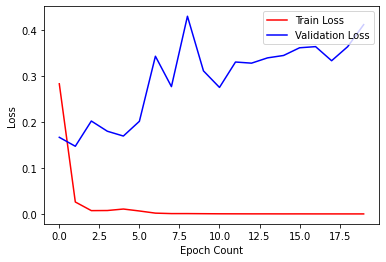

In [ ]:
plt.figure()
method = 'DCNN_CBAM'
plt.xlabel('Epoch Count')
plt.ylabel('Loss')
plt.plot(np.arange(0, nEpochs), train_loss[:], color='r')
plt.plot(np.arange(0, nEpochs), test_loss[:], 'b')
plt.legend(('Train Loss', 'Validation Loss'), loc='upper right')
result_path = os.path.join(outputPath , 'Clarkson_Dataset_Results/Results')
plt.savefig(os.path.join(result_path, method+'_Loss.jpg'))

In [ ]:
def get_threshold(fprs, thresholds, fpr):
  threshold = 0
  for x in range(0, fprs.size):
    if fprs[x] >= fpr:
        break
    threshold = thresholds[x]
  return threshold

In [ ]:
from sklearn.metrics import roc_curve
(fprs, tprs, thresholds) = roc_curve(testTrueLabels, predictScore)
path = outputPath

with open(os.path.join(path , method +'_TDR-ACER.csv'), mode='w+') as fout:
  fprArray = [0.002,0.001, 0.01, 0.05]
  for fpr in fprArray:
      tpr = np.interp(fpr, fprs, tprs)
      threshold = get_threshold(fprs, thresholds, fpr)
      fout.write("TDR @ FDR, threshold: %f @ %f ,%f\n" % (tpr, fpr, threshold))

      print("TDR @ FDR, threshold: %f @ %f ,%f " % (tpr, fpr, threshold))

TDR @ FDR, threshold: 0.939032 @ 0.002000 ,0.516587 
TDR @ FDR, threshold: 0.936641 @ 0.001000 ,0.523744 
TDR @ FDR, threshold: 0.943814 @ 0.010000 ,0.493002 
TDR @ FDR, threshold: 0.957561 @ 0.050000 ,0.401481 
